<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/main/Actividad_Semana_9_Equipo38_ejercicio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Profr: Luis Eduardo Falcón Morales

## **Adtividad de la Semana 9**
###**Taxonomía de Métricas de Clasificación**

**Nombres y matrículas de los integrantes del equipo:**

*   Alberto Jose Garcia Porras (A01793509)
*   Carlos Julio León Caicedo (A01793947)
*   Luis Fernando Ríos Piedra (A00453954)
*   Marco Antonio Vázquez Morales (A01793704)


---

# 1. Resumen del artículo

---

Garantizar una correcta evaluación del modelo de aprendizaje es clave para asegurar un adecuado reconocimiento de patrones, en ese sentido, existen dos aspectos clave a tener en cuenta para la evaluación, el primero basado en los datos estadísticos e intervalos de confianza del modelo, y el otro basado en la métrica utilizada para evaluarlo. Teniendo en cuenta que existen diferentes métricas de clasificación enfocadas en diversos tópicos del aprendizaje, es importante identificar la métrica adecuada para el modelo que estemos desarrollando.  Asimismo, dadas las características de las métricas, existe una clasificación que las agrupa por familia, generando básicamente las siguientes categorias:

*   Métricas basadas en un umbral y una comprensión cualitativa del error (**Threshold**).
*   Métricas basadas en una comprensión probabilistica del error (**Probabilistic**).
*   Métricas basadas en que también se clasifica un modelo (**Rank**).

Lo anterior nos lleva a otro interrogante, ¿Puedo seleccionar cualquier métrica para evaluar mi modelo?, precisamente esta es la respuesta que se plantea con el estudio, ya que no necesariamente se podrán extrapolar los resultados obtenidos a partir de una métrica aplicada a un modelo utilizando otras métricas de la misma familia, sobretodo cuando estamos lidiando con problemas multi-clase, clases desbalanceadas o conjuntos de datos pequeños. De igual forma, existen características presentes en algunas métricas que pueden generar sensibilidad en la obtención de los resultados generadas por las métricas que no poseen dichas características. Por lo anterior, es importante identificar la correlación existente entre las métricas que decidamos utilizar en nuestro modelo.
Por otra parte, un aspecto a considerar es la diferencia que pueda existir entre los clasificadores y las buenas probabilidades, lo que nos lleva evaluar la calibración de las mismas, que no es otra cosa que el grado de aproximación de las probabilidades previstas versus las probabilidades reales. Sin embargo, esto nos provoca otro problema que tiene que ver con los segmentos o intervalos en que se divide un conjunto de datos, para lo que se ha experimentado superponerlos. 

Una de las métricas más usadas para evaluar una clasificación es la **precisión**, que es el grado de predicciones correctas de un modelo. 

**Área Bajo la Curva (AUC)** es otra de las métricas usadas, se define como la probabilidad de que un clasificador clasifique de manera positiva una instancia en vez de una negativa tomadas al azar. 

**Error Absoluto Medio (MAE)** muestra cuánto se desvian las predicciones de la probabilidad real. 

**Error Cuadrático Medio (MSE)** es una variante de MAE que penaliza fuertemente las debiaciones de la probabilidad real.

Una primera conclusión que se llega en el artículo es que ninguna de las 18 métricas tiene un sí en el umbral de clase y en la calibraación o clasificación, esto es que no hay medida que combine el umbral con la probabilidad estimada. 

Una segunda conclusión es que al aplicar ruido al conjunto de datos, en este caso la precisión y otras medidas cualitativas son mejores cuando el ruido esta presente en el conjunto de datos. Por el contrario, estas son malas cuando el ruido es aplicado al aprendizaje.

Finalmente, se observa que las diferentes métricas no pueden ser comparables, usando las correlaciones se encontró que estas suelen tener desempeño bajo entre las diversas medidas. 




Describe el problema y el objetivo que se busca.

¿Es un problema desbalanceado? ¿Cómo se podría enfrentar?

¿Qué implicaciones a que conllevan un FP o un FN?

Determinar el tipo de métrica de acuerdo a la Taxonomía de los autores.



---

# 2. Propuesta de métrica(s) para BD "**Breast Cancer Wisconsin (Diagnostic) Data Set**"

---


**Problema - Objetivo:** Se debe realizar un modelo que permita clasificar un posible tumor en el seno como benigno (clase 2) o maligno (clase 4) a partir de las imagenes capturadas a pacientes en Wisconsin. A través de las imagenes podemos identificar los 9 atributos de entrada que nos permitirán realizar la categorización requerida.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# librerias ejercicio 5
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [ ]:
columnas = ["Número de identificación del número de código de muestra", "Grosor del grupo", "Uniformidad del tamaño de la celula", "Uniformidad de la forma celular", "Adhesión marginal",
            "Tamaño de célula epitelial única", "Núcleos desnudos", "Cromatina suave", "Nucléolos normales", "Mitosis", "Clase"]

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(path, sep=',', names=columnas)

df.index.name = None

df.head()

,Número de identificación del número de código de muestra,Grosor del grupo,Uniformidad del tamaño de la celula,Uniformidad de la forma celular,Adhesión marginal,Tamaño de célula epitelial única,Núcleos desnudos,Cromatina suave,Nucléolos normales,Mitosis,Clase
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2



---
**Balanceo de clases en el conjunto:** De acuerdo a la revisión pudimos determinar que el conjunto se encuentra desbalanceado en las clases.


*   Clase 2 (Benigno): %66
*   Clase 4 (Maligno): %34

---


In [ ]:
#Revisando el balanceo de las clases
print("El porcentaje de la clase 2 es:",len(df[df['Clase']==2])/len(df['Clase']))
print("El porcentaje de la clase 4 es:",len(df[df['Clase']==4])/len(df['Clase']))

El porcentaje de la clase 2 es: 0.6552217453505007
El porcentaje de la clase 4 es: 0.3447782546494993



---
**¿Cómo enfrentamos el desbalanceo?** 

---
Inicialmente crearemos un modelo dummy para definir el objetivo al que queremos llegar con el balanceo, posteriormente aplicaremos la técnica  SMOTE, ya que el desbalanceo no es extremadamente alto y dicha técnica nos permitirá crear registros en la clase minoritaria (2) sin impactar fuertemente los pesos en los atributos de entrada.

---
**Implicaciones de un FP o un FN:** 

---
Un falso positivo (FP) en el modelo implica categorizar un tumor benigno (2) como maligno (4), desde el punto de vista del paciente, se pueden generar afectaciones tanto psicológicas (debido al estrés de la enfermedad) como físicas (debido al suministro de medicamentos que no requiere).
Un falso negativo (FN) en el modelo implica categorizar un tumor maligno (4) como benigno (2), desde el punto de vista del paciente, se puede generar deterioro de su salud debido a que no se le suministrará el tratamiento que requiere.


---
**Tipo de métrica a utilizar de acuerdo a taxonomía del artículo:** 

---
Teniendo en cuenta la criticidad en la separación de las clases para este tipo de modelos que clasifican diagnósticos de salud, debemos utilizar una métrica en la que dicha separación sea crucial. Por ello haremos uso de la métrica **AUNU** (AUC of each class against the rest, using the uniform class distribution), en la cual se presenta un comportamiento aceptable con el ruido o la distorsión en los datos del conjunto o durante el entrenamiento del modelo, adicionalmente como nuestros datos se encuentran balanceados obtendremos mejores resultados a partir de esta métrica.


---

# 3. Propuesta de métrica(s) para BD "**South German Credit Data Set**"
Carlos

---

---

# 4. Propuesta de métrica(s) para BD "**Telco customer churn: IBM dataset**"
Luis

---

---

# 5. Propuesta de métrica(s) para BD "**Qualitative_Bankruptcy Data Set**"
Marco

---

In [26]:
columnas = ["Riesgo Industrial", "Administración de Riesgo", "Flexibilidad Financiera", "Credibilidad", "Competitividad",
            "Riesgo de Operación", "Clase"]
df = pd.read_table("Qualitative_Bankruptcy.data.txt", sep = ",", names=columnas)

df



,Riesgo Industrial,Administración de Riesgo,Flexibilidad Financiera,Credibilidad,Competitividad,Riesgo de Operación,Clase
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


**Balanceo de clases en el conjunto**
Verificamos si el conjunto de datos se encuentra desbalanceado. 

In [29]:
print(pd.value_counts(df['Clase'], sort = True))

NB    143
B     107
Name: Clase, dtype: int64


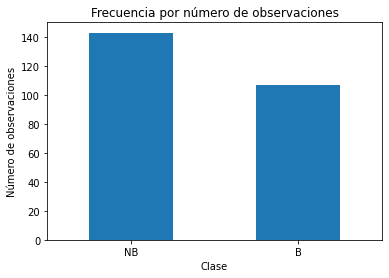

In [34]:
cuenta_de_clase = pd.value_counts(df['Clase'], sort = True)
cuenta_de_clase.plot(kind = 'bar', rot=0)
plt.xticks(range(2))
plt.title("Frecuencia por número de observaciones")
plt.xlabel("Clase")
plt.ylabel("Número de observaciones");

In [31]:
#Revisando el balanceo de las clases
print("El porcentaje de la clase NB es:",len(df[df['Clase']=="NB"])/len(df['Clase']))
print("El porcentaje de la clase B es:",len(df[df['Clase']=="B"])/len(df['Clase']))

El porcentaje de la clase NB es: 0.572
El porcentaje de la clase B es: 0.428


¿Cómo enfrentamos el desbalanceo?

De acuerdo a la revisión pudimos determinar que el conjunto no se encuentra desbalanceado, si observamos la gráfica de barras veremos que no se puede afirmar un desbalanceo.

1.   Clase NB (No esta en Bancarrota): 57.2%
2.   Clase B (Bancarrota): 42.8%

---
**Implicaciones de un FP o un FN:** 

---
Un falso positivo (FP) en el modelo implica categorizar en bancarrota a alguien que no lo esta.
Un falso negativo (FN) en el modelo implica no categorizar a alguien en bancarrota cuando en realidad si esta en bancarrota, esto implicaría que podría obtener un crédito y podría no pagar, lo que conllevaría a una perdida en caso de que no pueda pagar.



---
**Tipo de métrica a utilizar de acuerdo a taxonomía del artículo:** 

---
Al ser un problema de clasificación usaremos las métricas:


*   **precisión**, con la finalidad de medir la calidad el modelo al momento de predecir.
*   **recall**, para identificar los clientes que estarían en bancarrota
*   **accuracy**, con el objetivo de medir el porcentaje de aciertos que el modelo ha identificado.